In [774]:
# Importamos librerías de análisis de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import sys

import plotly.express as px
import plotly.graph_objects as go

VALOR_CAMBIO_A_DOLAR = 19.54

In [775]:
#Cargamos el dataframe
propiedades = pd.read_csv('data/train.csv', parse_dates=['fecha'])

In [776]:
propiedades.dtypes

id                                     int64
titulo                                object
descripcion                           object
tipodepropiedad                       object
direccion                             object
ciudad                                object
provincia                             object
antiguedad                           float64
habitaciones                         float64
garages                              float64
banos                                float64
metroscubiertos                      float64
metrostotales                        float64
idzona                               float64
lat                                  float64
lng                                  float64
fecha                         datetime64[ns]
gimnasio                             float64
usosmultiples                        float64
piscina                              float64
escuelascercanas                     float64
centroscomercialescercanos           float64
precio    

In [777]:
#Agrego una columna con el precio de las propiedades en dolar.
propiedades['precio(USD)'] = propiedades['precio'] / VALOR_CAMBIO_A_DOLAR

In [778]:
#Creo un nuevo dataframe que contengo solo la ciudad y el precio. Excluye los registros sin ciudad
precioPorProvincia = propiedades.dropna(subset=['provincia'])[['provincia', 'precio(USD)']]

In [779]:
precioPorProvincia = precioPorProvincia.groupby(['provincia']).mean()
precioPorProvincia = precioPorProvincia.sort_values(by=['precio(USD)'])

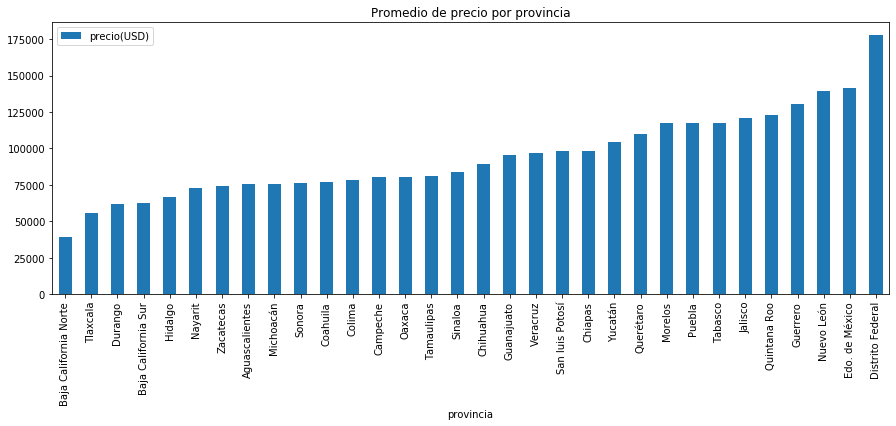

In [780]:
precioPorProvincia.plot(kind='bar', figsize=(15, 5), rot=90, 
                                       title="Promedio de precio por provincia");

In [781]:
#Valor de las ciudad para las 5 provincias mas caras
#TODO
tipoDePropiedadPorProvincia = propiedades.dropna(subset=['provincia'])[['provincia', 'ciudad']]

In [782]:
#Creo dataframe que tenga como columnas tipoDePropiedad y los amenities
amenitiesPorPropiedad = propiedades[['tipodepropiedad','piscina','gimnasio', 'usosmultiples']].dropna(subset=['tipodepropiedad'])

#Calculo la media de cada amenitie por propiedad
amenitiesPorPropiedad = amenitiesPorPropiedad.groupby(['tipodepropiedad']).mean()

amenitiesPorPropiedad
#Elimino los registros que tienen cero en algun amenitie, si no están en el grafico no tienen amenitie
#TODO: Improve filter method
amenitiesPorPropiedad = amenitiesPorPropiedad.loc[lambda x: x["gimnasio"] != 0.000000, :].loc[lambda x: x["usosmultiples"] != 0.000000, :].loc[lambda x: x["piscina"] != 0.000000, :]



In [783]:
#Show HeatMap
fig = go.Figure(data=go.Heatmap(
                   z=[amenitiesPorPropiedad['piscina'], amenitiesPorPropiedad['gimnasio'], amenitiesPorPropiedad['usosmultiples']],
                   x=amenitiesPorPropiedad.index,
                   y=amenitiesPorPropiedad.columns))

fig.update_layout(
    title='Promedio de Amenities por tipo de propiedad',
    xaxis_nticks=36)

fig.show()

In [784]:
#
amenitiesPorPropiedad = propiedades[['metrostotales', 'tipodepropiedad','antiguedad','provincia']]\
    .dropna(subset=['metrostotales']).dropna(subset=['tipodepropiedad']).dropna(subset=['antiguedad']).dropna(subset=['provincia'])

amenitiesPorPropiedad = amenitiesPorPropiedad.loc[lambda x: x["tipodepropiedad"] == 'Apartamento', :]
amenitiesPorPropiedad = amenitiesPorPropiedad.loc[lambda x: x["provincia"] == 'Distrito Federal', :]

amenitiesPorPropiedad = amenitiesPorPropiedad.groupby(['antiguedad']).agg({'metrostotales':'mean'}).reset_index()


In [785]:
#Show
fig = px.line(amenitiesPorPropiedad, x="antiguedad", y="metrostotales", title='Promedio de metros cuadrados por antiguedad para apartamentos en Distrito Federal')
fig.show()